# Loan Prediction

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [86]:
df = pd.read_csv("https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train_2.csv")


In [87]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [88]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [89]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [90]:
df.shape

(614, 13)

In [91]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [92]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [93]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [94]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [95]:
df.dropna(inplace=True)

In [96]:
le = LabelEncoder()


In [97]:
categorical_feature_mask = df.dtypes==object

In [98]:
categorical_cols = df.columns[categorical_feature_mask].tolist()


In [99]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [100]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [101]:
df.drop('Loan_ID',axis=1 , inplace=True)

In [102]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [103]:
train, test = train_test_split(df, test_size=0.3, random_state=0)


In [104]:
x_train = train.drop('Loan_Status',axis=1)
y_train = train['Loan_Status']


In [105]:
x_test = test.drop('Loan_Status',axis=1)
y_test = test['Loan_Status']


In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
clf = LogisticRegression(random_state=0)
mean_time = 0
for i in range(10):
    t1 = datetime.now()
    clf.fit(x_train, y_train)
    t2 = datetime.now()
    mean_time = mean_time + round((t2 - t1).microseconds/1000,1)
print(mean_time/10)

28.26


In [108]:
y_pred = clf.predict(x_test)

In [109]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [110]:
y_pred = pd.Series(y_pred)

In [111]:
y_pred.value_counts()

1    127
0     17
dtype: int64

In [112]:
y_test.value_counts()

1    95
0    49
Name: Loan_Status, dtype: int64

In [113]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [114]:
print(accuracy_score(y_test, y_pred) * 100)
print(recall_score(y_test, y_pred) * 100)
print(precision_score(y_test, y_pred) * 100)
print(f1_score(y_test, y_pred) * 100)

77.77777777777779
100.0
74.80314960629921
85.58558558558559


Test thử với thuật toán Bagging

In [43]:
from datetime import datetime

In [ ]:
mean_time = 0
for i in range(10):
    model = BaggingClassifier(LogisticRegression(random_state=0))
    t1 = datetime.now()
    model.fit(x_train, y_train)
    t2 = datetime.now()
    mean_time = mean_time + round((t2 - t1).microseconds/1000,1)

print(mean_time/10)
accuracy = model.score(x_test,y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))



In [41]:
y_pred = model.predict(x_test)
prec = precision_score(y_test, y_pred)
prec

0.7580645161290323

Test thử với thuật toán Random Forest

In [115]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [116]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 77.08%


In [117]:
y_pred = model.predict(x_test)
prec = precision_score(y_test, y_pred)
prec

0.7540983606557377

Có thể thấy ngay cả những thuật toán bagging cũng có sự chênh lệch 

Test với Thuật toán ADA Boost

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
clf = RandomForestClassifier()
model = AdaBoostClassifier(base_estimator = clf,random_state=1)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 77.78%


In [121]:
y_pred = model.predict(x_test)
prec = precision_score(y_test, y_pred)
prec

0.7603305785123967

Có thể thấy, thuật toán ADABoost chỉ đem lại độ chính xác 72.22% 

Thử với Gradient Boosting 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier


In [60]:
model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.47%


In [61]:
y_pred = model.predict(x_test)
prec = precision_score(y_test, y_pred)
prec

0.753968253968254

=> Vì mô hình có nhiều features , nên khá phức tạp, thuật toán GBoost có vẻ cải thiện được accuracy score. 

Giờ thử với XGBoost

In [64]:
import xgboost as xgb

In [65]:
model = xgb.XGBClassifier(random_state=1, eta=0.01)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.92%


Test với Light GBM

In [67]:
import lightgbm as lgb

In [68]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.22%


Ngoài ra , các thuật toán trên đều sử dụng base learner/weak learner là decision tree. Hãy thử edit chúng thành các thuật toán khác như logistic regression.

# Boston house

In [69]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [70]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [73]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [74]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [75]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [77]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


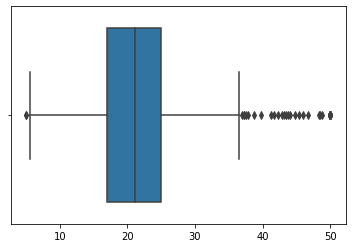

In [76]:
import seaborn as sns 
sns.boxplot(y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [79]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [80]:
regressor.fit(X_train, y_train)


[14:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [81]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.017767,0.008122,0.020727,0.008274,0.041181,0.20062,0.006303,0.037363,0.013733,0.024028,0.043548,0.012649,0.565686


In [82]:
y_pred = regressor.predict(X_test)


In [83]:
mean_squared_error(y_test, y_pred)


11.47457123147543

In [84]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.304126276932362